<img src="images/usm.jpg" width="480" height="240" align="left"/>

# MAT281 - Laboratorios N°01

## Objetivos del laboratorio

* Reforzar conceptos básicos de regresión lineal.

## Contenidos

* [Problema 01](#p1)


<a id='p1'></a>
## I.- Problema 01


<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/b6/Anscombe.svg/1200px-Anscombe.svg.png" width="360" height="360" align="center"/>



El **cuarteto de Anscombe** comprende cuatro conjuntos de datos que tienen las mismas propiedades estadísticas, pero que evidentemente son distintas al inspeccionar sus gráficos respectivos.

Cada conjunto consiste de once puntos (x, y) y fueron construidos por el estadístico F. J. Anscombe. El cuarteto es una demostración de la importancia de mirar gráficamente un conjunto de datos antes de analizarlos.

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_palette("deep", desat=.6)
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [2]:
# cargar datos
df = pd.read_csv(os.path.join("data","anscombe.csv"), sep=",")
df.head()

,x,y,grupo
0,10,8.04,Grupo_1
1,8,6.95,Grupo_1
2,13,7.58,Grupo_1
3,9,8.81,Grupo_1
4,11,8.33,Grupo_1


Basado en la información presentada responda las siguientes preguntas:

1. Gráfique mediante un gráfico tipo **scatter** cada grupo. A simple vista, ¿ los grupos son muy distintos entre si?.
2. Realice un resumen de las medidas estadísticas más significativas ocuapando el comando **describe** para cada grupo. Interprete.
3. Realice un ajuste lineal para cada grupo. Además, grafique los resultados de la regresión lineal para cada grupo. Interprete.
4. Calcule los resultados de las métricas para cada grupo. Interprete.
5. Es claro que el ajuste lineal para algunos grupos no es el correcto. Existen varias formas de solucionar este problema (eliminar outliers, otros modelos, etc.). Identifique una estrategia para que el modelo de regresión lineal ajuste de mejor manera e implemente otros modelos en los casos que encuentre necesario.  

1. **scatterplot**

In [3]:
#1
agrupado = df.groupby('grupo')
str = ['Grupo_1','Grupo_2','Grupo_3','Grupo_4']
grupos = [agrupado.get_group(g) for g in str] #dataframes de cada grupo
map = lambda n: [int(np.floor(n/2)),int(np.mod(n,2))] #funcion que mapea 0->(0,0) 1->(0,1) 2->(1,0) 3->(1,1)
index =[map(i) for i in range(0,4)] #indices para graficar con un solo loop


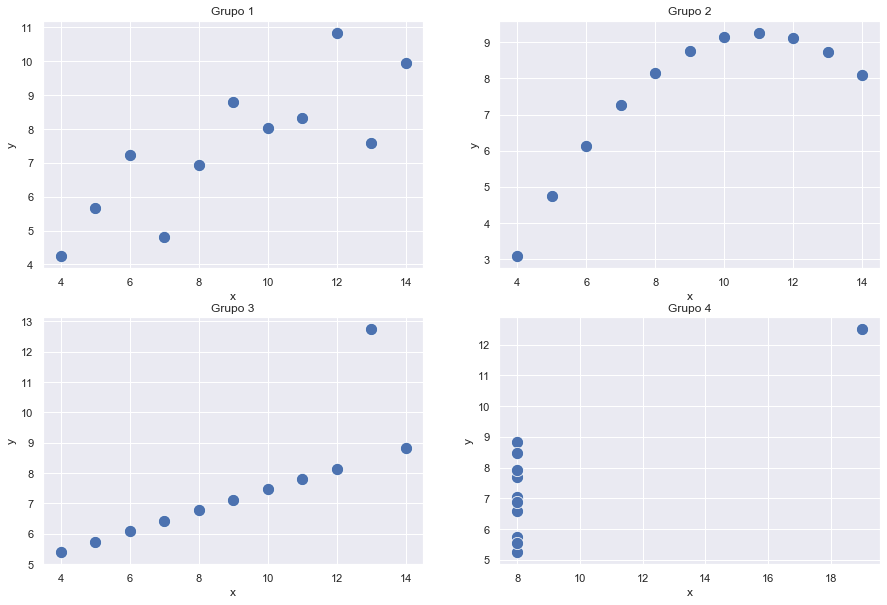

In [4]:
fig,ejes = plt.subplots(2,2,figsize=(15,10))
for i in range(0,4):
    sns.scatterplot(
        x = 'x',
        y = 'y',
        data = grupos[i],
        ax = ejes[index[i][0]][index[i][1]],
        s=150
    )
    ejes[index[i][0]][index[i][1]].set_title(f"Grupo {i+1}")


Viendo las dispersiones de los cuatro grupos, estos no son parecidos entre sí en cuanto a la distribución de los datos.

2. **describe**

In [5]:
# 2
stats = [display(grupos[k].describe().style.set_caption(f'Grupo {k+1}')) for k in range(0,4)]

,x,y
count,11,11
mean,9,7.50091
std,3.31662,2.03157
min,4,4.26
25%,6.5,6.315
50%,9,7.58
75%,11.5,8.57
max,14,10.84


,x,y
count,11,11
mean,9,7.50091
std,3.31662,2.03166
min,4,3.1
25%,6.5,6.695
50%,9,8.14
75%,11.5,8.95
max,14,9.26


,x,y
count,11,11
mean,9,7.5
std,3.31662,2.03042
min,4,5.39
25%,6.5,6.25
50%,9,7.11
75%,11.5,7.98
max,14,12.74


,x,y
count,11,11
mean,9,7.50091
std,3.31662,2.03058
min,8,5.25
25%,8,6.17
50%,8,7.04
75%,8,8.19
max,19,12.5


Notar que los 4 grupos presentan medias y varianzas muestrales similares entre si, lo que cambiaría sería como estan distribuidos los datos (lo que se puede observar en las dispersiones de (1) y analizando los percentiles, minimos y maximos mostrados con el comando __describe()__).

3. **regresion lineal**


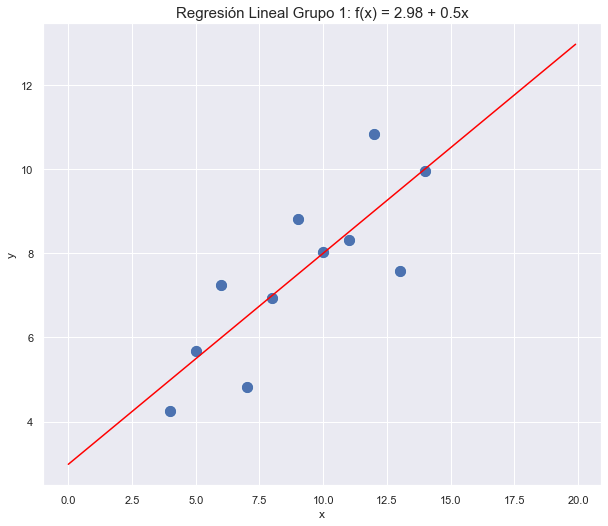

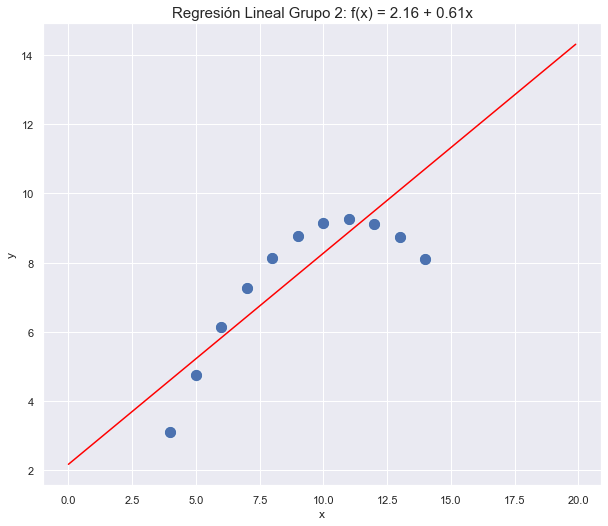

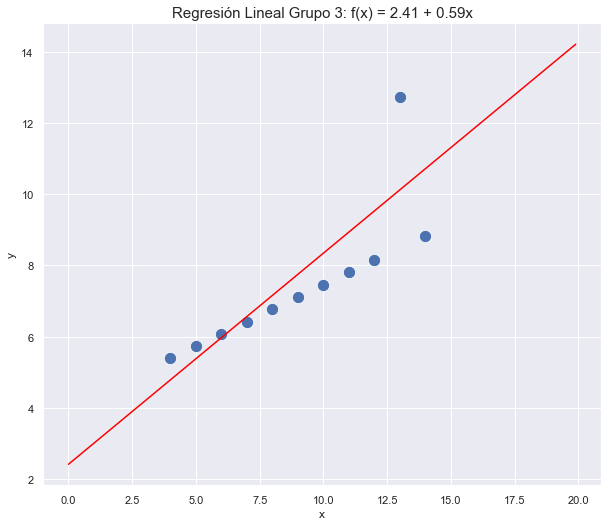

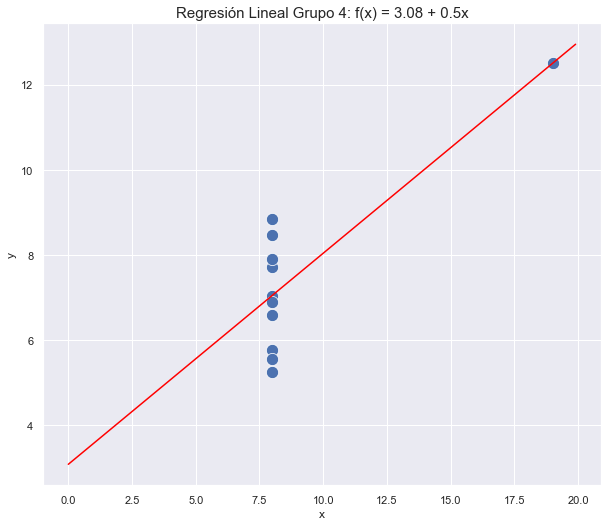

In [6]:
# 3
# sklearn
from sklearn import datasets
from sklearn.model_selection import train_test_split

metricas = []
for i in range(0,4):    
    X = grupos[i][['x']]
    y = grupos[i]['y']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

    from sklearn.linear_model import LinearRegression
    model_rl = LinearRegression()
    model_rl.fit(X_train, y_train)

    # lista de coeficientes B para cada X
    beta_0 = round(model_rl.intercept_,2)
    beta_1 = round(model_rl.coef_[0],2)

    func = f"f(x) = {beta_0} + {beta_1}x"

    # predicciones
    Y_predict = model_rl.predict(X_test)
    
    # graficos con seaborn
    beta_0 = model_rl.intercept_
    beta_1 = model_rl.coef_[0]

    x_range = np.arange(0,20,0.1)

    df_plot = pd.DataFrame({'x':x_range,
                            'y_true':[beta_0 + beta_1*n for n in x_range]})

    dfa = pd.DataFrame({'x':X['x'], 
                        'y_true':y})

    fig, ax = plt.subplots(figsize=(10, 8.5))

    aa = sns.scatterplot(x='x', y='y_true', data=dfa, ax=ax, s=150)
    aa = sns.lineplot(x='x', y='y_true', data=df_plot,ax=ax,color="red")
    plt.title(f'Regresión Lineal Grupo {i+1}: {func}', size=15)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()
    
    # se guardarán las métricas para imprimirlas en 4)
    from metrics_regression import *
    from sklearn.metrics import r2_score
    df_temp = pd.DataFrame(
        {
            'y':y_test,
            'yhat': model_rl.predict(X_test)
            }
    )

    df_metrics = summary_metrics(df_temp)
    df_metrics['r2'] =  round(r2_score(y_test, model_rl.predict(X_test)),4)
    metricas.append(df_metrics)

4. **metricas**

In [7]:
# 4
arr = [print(f'\nMetricas para el regresor x para Grupo {i+1}:\n{metricas[i]}') for i in range(0,4)]


Metricas para el regresor x para Grupo 1:
      mae     mse    rmse    mape   maape   wmape   mmape   smape      r2
0  0.0444  0.0021  0.0454  0.0049  0.0049  0.0049  0.0044  0.0049  0.9978

Metricas para el regresor x para Grupo 2:
      mae     mse   rmse    mape   maape   wmape   mmape   smape      r2
0  1.7418  3.7948  1.948  0.2089  0.2035  0.2021  0.1865  0.1889 -13.034

Metricas para el regresor x para Grupo 3:
    mae     mse    rmse    mape   maape   wmape   mmape   smape      r2
0  1.38  2.1506  1.4665  0.1654  0.1635  0.1693  0.1476  0.1519 -3.5171

Metricas para el regresor x para Grupo 4:
      mae     mse    rmse    mape   maape   wmape   mmape  smape      r2
0  0.2388  0.1099  0.3315  0.0362  0.0362  0.0351  0.0315  0.035 -1.0775


La única regresión aceptable sería la realizada para el grupo 1 ya que presenta bajos errores porcentuales y coeficiente $R^2$ cercano a 1. Las demás presentan altos errores porcentuales y $R^2$ negativos por lo que descarta que se esté modelando correctamente.

5. Para el grupo 3 bastaría realizar un nuevo ajuste eliminando los datos outliers de la muestra. El grupo 4 presenta todos sus valores x iguales con excepción de un outlier, por lo que se puede ajustar mediante la recta x = 8 luego de elminarlo. En cuanto al grupo 2 se podría ajustar empleando un modelo logaritmico.

,x,y,grupo
0,10,7.46,Grupo_3
1,8,6.77,Grupo_3
2,9,7.11,Grupo_3
3,11,7.81,Grupo_3
4,14,8.84,Grupo_3
5,6,6.08,Grupo_3
6,4,5.39,Grupo_3
7,12,8.15,Grupo_3
8,7,6.42,Grupo_3
9,5,5.73,Grupo_3


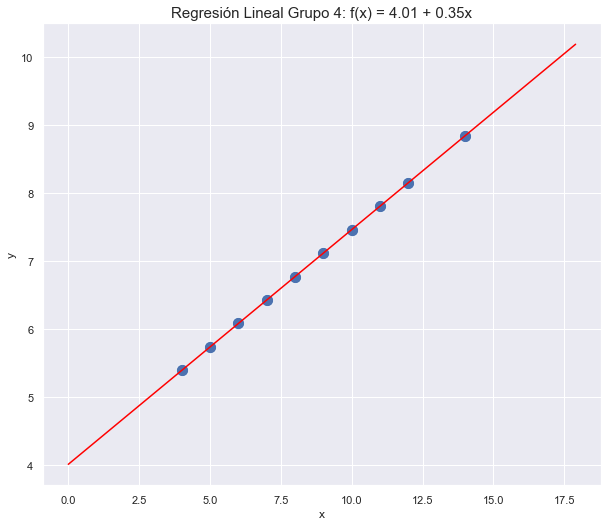


Metricas para el regresor x para Grupo 3:
      mae  mse    rmse    mape   maape   wmape   mmape   smape      r2
0  0.0023  0.0  0.0027  0.0004  0.0004  0.0004  0.0003  0.0004  0.9998


In [8]:
# 5
# para grupo 3 eliminar el outlier que se puede ver en (2) que es el dato con valor y máximo
group_temp = grupos[2]
group_temp = group_temp[group_temp.y != group_temp.y.max()].reset_index(drop=True)
display(group_temp)

X = group_temp[['x']]
y = group_temp['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LinearRegression
model_rl = LinearRegression()
model_rl.fit(X_train, y_train)

# lista de coeficientes B para cada X
beta_0 = round(model_rl.intercept_,2)
beta_1 = round(model_rl.coef_[0],2)

func = f"f(x) = {beta_0} + {beta_1}x"

# predicciones
Y_predict = model_rl.predict(X_test)

# graficos con seaborn
beta_0 = model_rl.intercept_
beta_1 = model_rl.coef_[0]

x_range = np.arange(0,18,0.1)

df_plot = pd.DataFrame({'x':x_range,
                        'y_true':[beta_0 + beta_1*n for n in x_range]})

dfa = pd.DataFrame({'x':X['x'], 
                    'y_true':y})

fig, ax = plt.subplots(figsize=(10, 8.5))

aa = sns.scatterplot(x='x', y='y_true', data=dfa, ax=ax, s=150)
aa = sns.lineplot(x='x', y='y_true', data=df_plot,ax=ax,color="red")
plt.title(f'Regresión Lineal Grupo {i+1}: {func}', size=15)
plt.ylabel('y')
plt.show()

# metricas
from metrics_regression import *
from sklearn.metrics import r2_score
df_temp = pd.DataFrame(
    {
        'y':y_test,
        'yhat': model_rl.predict(X_test)
        }
)

df_metrics = summary_metrics(df_temp)
df_metrics['r2'] =  round(r2_score(y_test, model_rl.predict(X_test)),4)
print(f'\nMetricas para el regresor x para Grupo 3:\n{df_metrics}')

,x,y,grupo
0,8,6.58,Grupo_4
1,8,5.76,Grupo_4
2,8,7.71,Grupo_4
3,8,8.84,Grupo_4
4,8,8.47,Grupo_4
5,8,7.04,Grupo_4
6,8,5.25,Grupo_4
7,8,5.56,Grupo_4
8,8,7.91,Grupo_4
9,8,6.89,Grupo_4


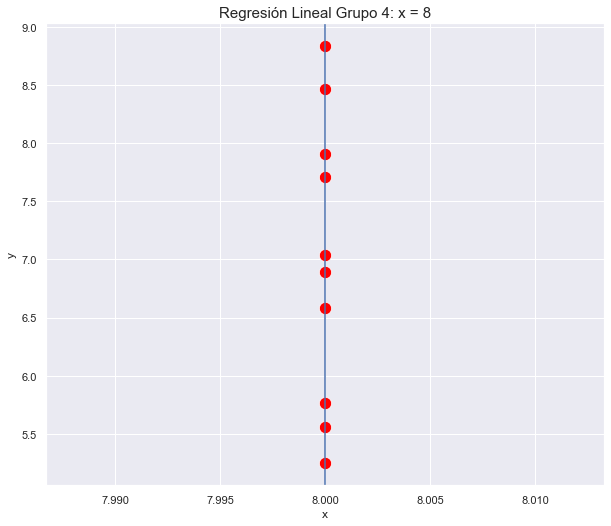

In [9]:
# para grupo 4 eliminar el outlier que se puede ver en (2) que es el dato con valor "x" e "y" máximo
group_temp = grupos[3]
group_temp = group_temp[group_temp.y != group_temp.y.max()].reset_index(drop=True)
display(group_temp)


fig, ax = plt.subplots(figsize=(10, 8.5))

aa = sns.scatterplot(x='x', y='y', data=group_temp, ax=ax, s=150,color="red")
plt.axvline(x=8)
plt.title(f'Regresión Lineal Grupo 4: x = 8', size=15)
plt.show()